About Dataset
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
This dataset is for ABC Multistate bank with following columns:

customer_id, unused variable.
credit_score, used as input.
country, used as input.
gender, used as input.
age, used as input.
tenure, used as input.
balance, used as input.
products_number, used as input.
credit_card, used as input.
active_member, used as input.
estimated_salary, used as input.
churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.
Aim is to Predict the Customer Churn for ABC Bank.

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Autoencoder%20for%20Customer%20Churn.ipynb

https://towardsdatascience.com/spurned-in-a-survival-forest-customer-churn-prediction-in-python-2083551f3cc5


https://medium.com/search?q=customer+churn+with+python

https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction

In [2]:
#!pip install PySurvival

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

#from pysurvival.utils.display import correlation_matrix, compare_to_actual, \
#       integrated_brier_score, create_risk_groups
#from pysurvival.utils.metrics import concordance_index      
#from pysurvival.models.survival_forest import ConditionalSurvivalForestModel

In [4]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [5]:
df=data.copy()
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EDA ANALYSIS

In [6]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
df.info()  # df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe()  

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.describe(include='object').T

,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457


In [10]:
df.select_dtypes(exclude="object").nunique()  # This expanded dataframe will enable us to run data science models that can quantify the influence of the feature variables on the churn risk.

customer_id         10000
credit_score          460
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [11]:
df.shape

(10000, 12)

In [12]:
# Check columns list and missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [13]:
# Get unique count for each variable
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [14]:
# Drop the columns as explained above
df = df.drop("customer_id", axis = 1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Check variable data types
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

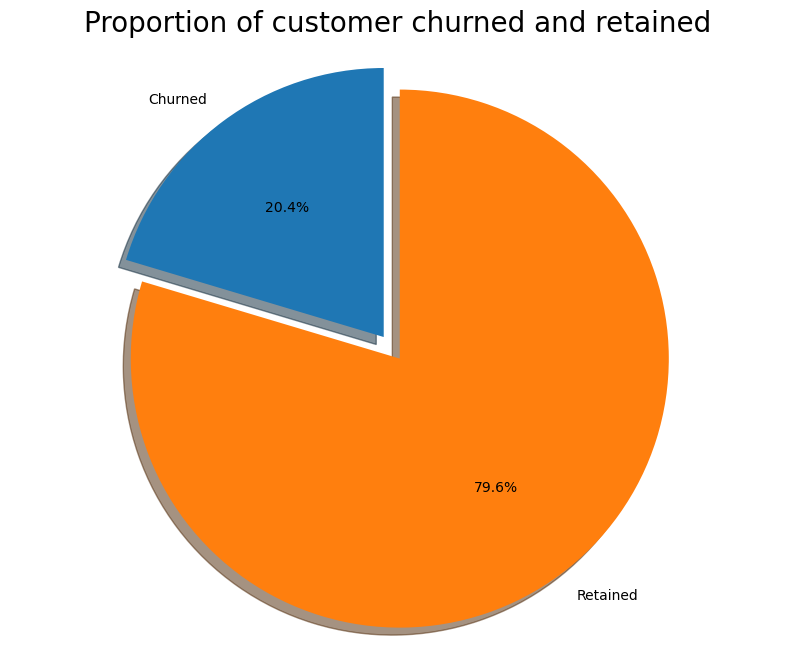

In [17]:
labels = 'Churned', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:>

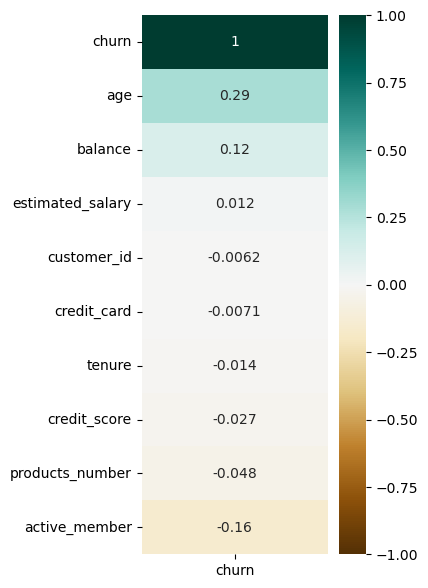

In [11]:
plt.figure(figsize=(3,7))
sns.heatmap(df.corr()[["churn"]].sort_values(by="churn",ascending=False), annot=True, cmap='BrBG',vmin=-1)

<Figure size 2000x1000 with 0 Axes>

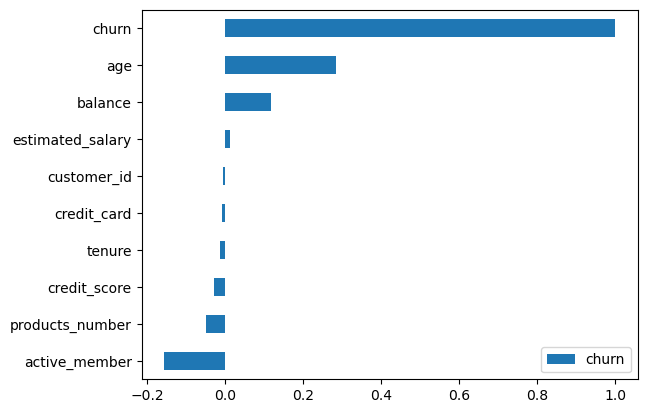

In [12]:
plt.figure(figsize=(20,10))
df.corr()[["churn"]].sort_values(by="churn").plot.barh();

customer_id

In [13]:
df.duplicated(subset=['customer_id']).sum()

0

In [14]:
df[df["customer_id"]& df["churn"]==1]  

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
22,15699309,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
30,15589475,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
35,15794171,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
47,15771573,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
70,15703793,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9956,15707861,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9975,15666295,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


churn

In [15]:
df.churn.value_counts(dropna=False)

0    7963
1    2037
Name: churn, dtype: int64

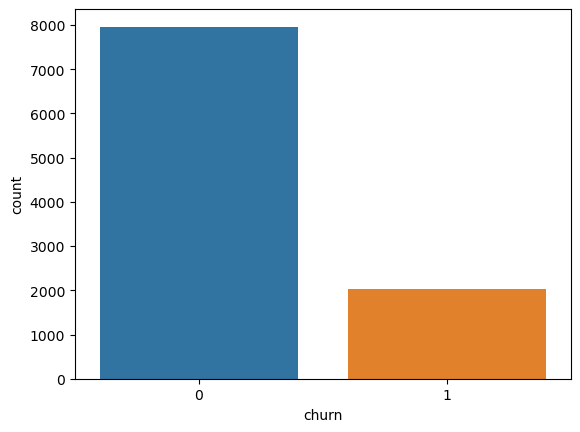

In [16]:
sns.countplot(x=df.churn, data=df)
plt.show()

In [17]:
df.groupby('churn').mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [18]:
fig = px.pie(df, "churn", color='churn', hole=.3)
fig.show()

In [81]:
gender_plot = df.groupby(['gender', 'churn']).size().reset_index().pivot(columns='churn', index='gender', values=0)
gender_plot.plot(x=gender_plot.index, kind='bar', stacked=True);
print('gender', collections.Counter(df['gender']))

KeyError: "None of [Index(['Female', 'Male'], dtype='object', name='gender')] are in the [columns]"

credit_score

In [ ]:
df.credit_score.min()

350

In [ ]:
df.credit_score.max()

850

In [ ]:
df.credit_score.mean()

650.5288

In [ ]:
df.credit_score.value_counts(dropna=False)

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: credit_score, Length: 460, dtype: int64

country

In [ ]:
df.country.value_counts(dropna=False)

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

<AxesSubplot:>

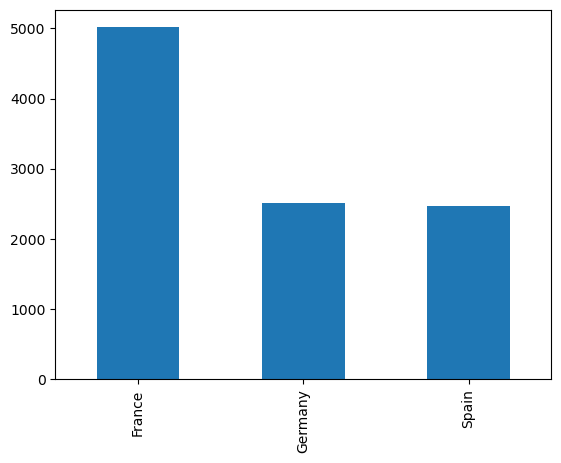

In [ ]:
df.country.value_counts(dropna=False).plot(kind="bar")

In [ ]:
df.groupby("country")["churn"].value_counts()

country  churn
France   0        4204
         1         810
Germany  0        1695
         1         814
Spain    0        2064
         1         413
Name: churn, dtype: int64

In [ ]:
df[(df["country"]=="Germany")&(df["churn"]==1)]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
46,15602280,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
47,15771573,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
53,15702298,655,Germany,Male,41,8,125561.97,1,0,0,164040.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9960,15681026,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9975,15666295,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9981,15672754,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1


In [ ]:
len(df[(df["country"] == "France") & (df["churn"]== 1)]) / len(df[(df["country"]=="France")]) *100


16.15476665337056

People of %16,15 who are from France left from the company.

In [ ]:
len(df[(df["country"]=="Germany")&(df["churn"]==1)]) / len(df[(df["country"]=="Germany")]) *100

32.44320446392985

People of %32,44 who are from German left from the company.

In [ ]:
len(df[(df["country"]=="Spain")&(df["churn"]==1)]) / len(df[(df["country"]=="Spain")]) *100

16.673395236172787

People of %16,67 who are from Spain left from the company.

<AxesSubplot:xlabel='country,churn'>

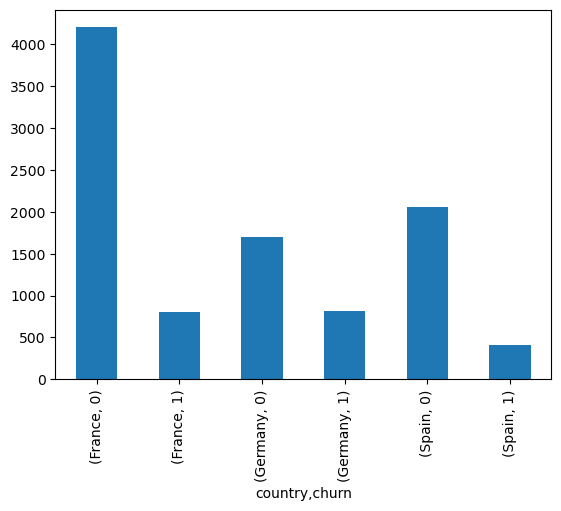

In [ ]:
df.groupby("country")["churn"].value_counts().plot(kind="bar")

gender

In [ ]:
df.gender.value_counts(dropna=False)

Male      5457
Female    4543
Name: gender, dtype: int64

<AxesSubplot:>

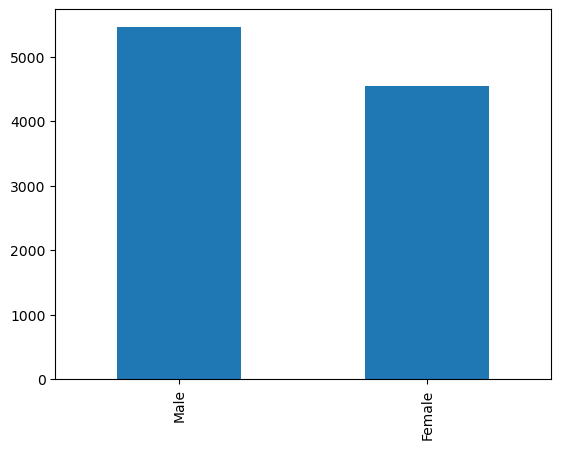

In [ ]:
df.gender.value_counts().plot(kind="bar")

In [ ]:
df.groupby("gender")["churn"].value_counts()

gender  churn
Female  0        3404
        1        1139
Male    0        4559
        1         898
Name: churn, dtype: int64

In [ ]:
len(df[(df["gender"] == "Male") & (df["churn"]== 1)]) / len(df[(df["gender"]=="Male")]) *100

16.455928165658786

%16.45 of male letf from the company among all the male.

In [ ]:
len(df[(df["gender"] == "Female") & (df["churn"]== 1)]) / len(df[(df["gender"]=="Female")]) *100

25.071538630860662

%25.07 of female letf from the company among all the female.

<AxesSubplot:xlabel='gender,churn'>

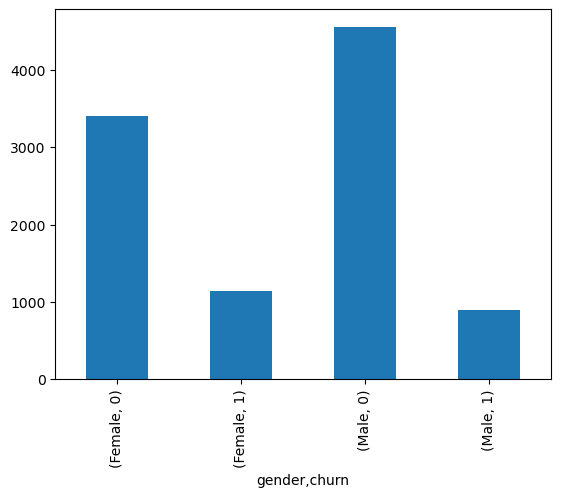

In [ ]:
df.groupby("gender")["churn"].value_counts().plot(kind="bar")

In [ ]:
len(df[(df["gender"]=="Female")&(df["churn"]==1)])

1139

There are totaly 1139 female who left from the company between total people.  

In [ ]:
len(df["gender"])

10000

In [ ]:
len(df[(df["gender"]=="Female")&(df["churn"]==1)]) / len(df["gender"]) *100

11.39

%11.39 of female left from the company among all the people.

In [ ]:
len(df[(df["gender"]=="Male")&(df["churn"]==1)]) / len(df["gender"]) *100

8.98

%8.98 of male left from the company among all the people.

age

In [ ]:
df.age.value_counts(dropna=False)

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

<AxesSubplot: >

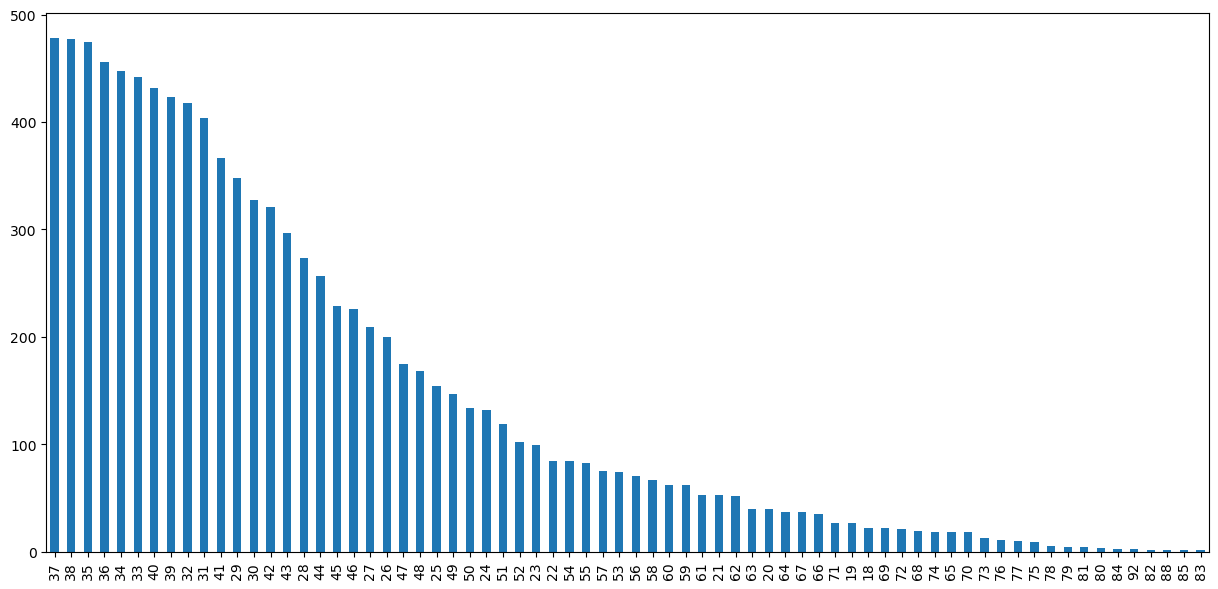

In [ ]:
plt.figure(figsize = (15,7))
df["age"].value_counts().plot.bar()

In [ ]:
df.age.mean()

38.9218

In [ ]:
df.age.max()

92

In [ ]:
df.age.min()

18

In [24]:
df.groupby("age")["churn"].value_counts(dropna=False)

age  churn
18   0        20
     1         2
19   0        26
     1         1
20   0        38
              ..
84   0         1
     1         1
85   0         1
88   0         1
92   0         2
Name: churn, Length: 128, dtype: int64

ayrılanlar en çok hangi yaşta ayrılmışlar sorusunun cevabı bulunacak.

In [36]:
#df.groupby(df[df["churn"]== 1])("age").value_counts(dropna=False).sort_values(ascending=False)

In [23]:
df.groupby("age")["churn"].value_counts(dropna=False).sort_values(ascending=False)

age  churn
35   0        417
37   0        416
38   0        414
34   0        414
36   0        403
             ... 
83   0          1
84   0          1
     1          1
85   0          1
88   0          1
Name: churn, Length: 128, dtype: int64

In [43]:
df.groupby("age")["balance"].value_counts()

age  balance  
18   0.00         8
     82767.42     1
     90544.00     1
     93816.70     1
     98894.39     1
                 ..
84   92242.34     1
85   0.00         1
88   0.00         1
92   121513.31    1
     126076.24    1
Name: balance, Length: 6450, dtype: int64

In [44]:
df.groupby("age")["active_member"].value_counts()

age  active_member
18   1                13
     0                 9
19   1                15
     0                12
20   0                21
                      ..
84   0                 1
     1                 1
85   1                 1
88   1                 1
92   1                 2
Name: active_member, Length: 131, dtype: int64

In [60]:
df[["age", "churn"]].value_counts()

age  churn
35   0        417
37   0        416
38   0        414
34   0        414
36   0        403
             ... 
83   0          1
84   0          1
     1          1
85   0          1
88   0          1
Length: 128, dtype: int64

tenure

In [ ]:
df.tenure.value_counts(dropna=False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

<AxesSubplot:>

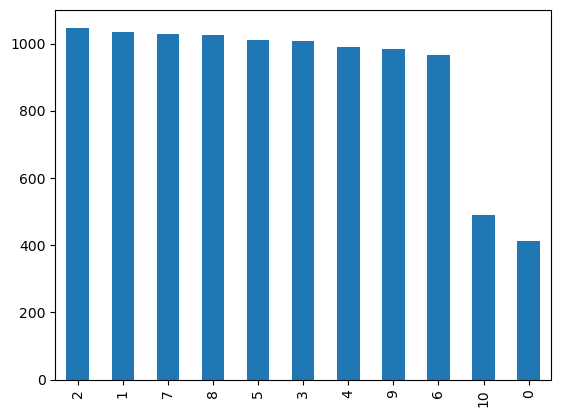

In [ ]:
df.tenure.value_counts(dropna=False).plot(kind="bar")

In [ ]:
df[(df["tenure"]==0)&(df["churn"]==1)]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
35,15794171,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
127,15782688,625,Germany,Male,56,0,148507.24,1,1,0,46824.08,1
164,15658929,683,Spain,Male,29,0,133702.89,1,1,0,55582.54,1
543,15705953,721,Spain,Male,51,0,169312.13,1,1,0,109078.35,1
615,15745295,727,Spain,Female,31,0,0.00,1,1,0,121751.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9210,15792650,382,Spain,Male,36,0,0.00,1,1,1,179540.73,1
9316,15766355,550,Germany,Male,49,0,108806.96,3,1,0,61446.92,1
9624,15668309,350,France,Female,40,0,111098.85,1,1,1,172321.21,1
9625,15732437,504,Germany,Female,44,0,131873.07,2,1,1,158036.72,1


In [ ]:
len(df[(df["tenure"]==0)&(df["churn"]==1)]) / len(df["tenure"]) *100

0.95

In [ ]:
len(df[(df["tenure"]==1)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.32

In [ ]:
len(df[(df["tenure"]==2)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.01

In [ ]:
len(df[(df["tenure"]==3)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.13

In [ ]:
len(df[(df["tenure"]==4)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.03

In [ ]:
len(df[(df["tenure"]==5)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.09

In [ ]:
len(df[(df["tenure"]==6)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.96

In [ ]:
len(df[(df["tenure"]==7)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.77

In [ ]:
len(df[(df["tenure"]==8)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.97

In [ ]:
len(df[(df["tenure"]==9)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.13

In [ ]:
len(df[(df["tenure"]==10)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.01

In [ ]:
df.groupby("tenure")["churn"].value_counts(dropna=False)

tenure  churn
0       0        318
        1         95
1       0        803
        1        232
2       0        847
        1        201
3       0        796
        1        213
4       0        786
        1        203
5       0        803
        1        209
6       0        771
        1        196
7       0        851
        1        177
8       0        828
        1        197
9       0        771
        1        213
10      0        389
        1        101
Name: churn, dtype: int64

balance

In [ ]:
df.balance.value_counts(dropna=False)

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: balance, Length: 6382, dtype: int64

products_number

In [ ]:
df.products_number.value_counts(dropna=False)

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [ ]:
df.groupby("products_number")["churn"].value_counts()

products_number  churn
1                0        3675
                 1        1409
2                0        4242
                 1         348
3                1         220
                 0          46
4                1          60
Name: churn, dtype: int64

credit_card

In [ ]:
df.credit_card.value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

<AxesSubplot:>

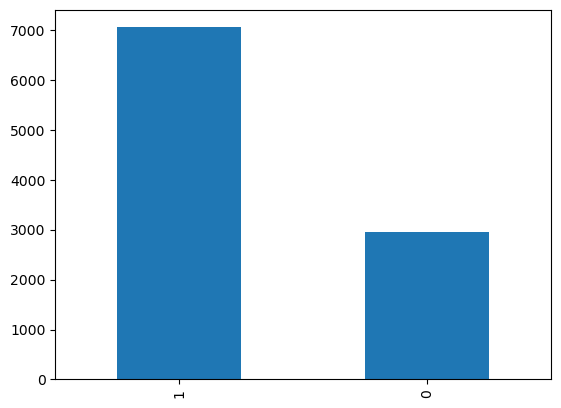

In [ ]:
df.credit_card.value_counts().plot(kind="bar")

In [ ]:
df.groupby("credit_card")["churn"].value_counts()

credit_card  churn
0            0        2332
             1         613
1            0        5631
             1        1424
Name: churn, dtype: int64

In [ ]:
len(df[(df["credit_card"] == 0) & (df["churn"]== 1)]) / len(df[(df["credit_card"]==0)]) *100

20.814940577249573

In [ ]:
len(df[(df["credit_card"] == 0) & (df["churn"]== 1)]) / len(df["credit_card"]) *100

6.13

In [ ]:
len(df[(df["credit_card"] == 1) & (df["churn"]== 1)]) / len(df[(df["credit_card"]==1)]) *100

20.184266477675408

In [ ]:
len(df[(df["credit_card"] == 1) & (df["churn"]== 1)]) / len(df["credit_card"]) *100

14.24

active_member

In [ ]:
df.active_member.value_counts(dropna=False)

1    5151
0    4849
Name: active_member, dtype: int64

<AxesSubplot:>

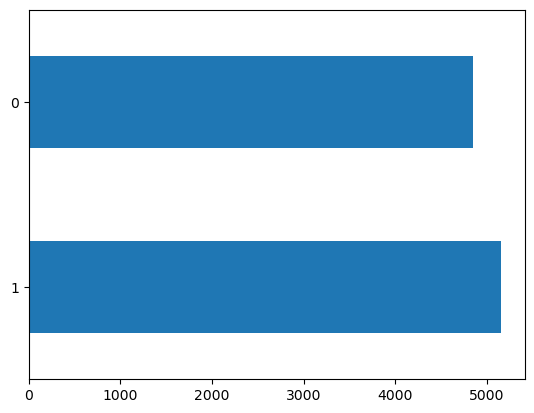

In [ ]:
df.active_member.value_counts(dropna=False).plot(kind="barh")

In [ ]:
df.groupby("active_member")["churn"].value_counts()

active_member  churn
0              0        3547
               1        1302
1              0        4416
               1         735
Name: churn, dtype: int64

In [ ]:
len(df[(df["active_member"] == 0) & (df["churn"]== 1)]) / len(df[(df["active_member"]==0)]) *100

26.850897092183956

In [ ]:
len(df[(df["active_member"] == 0) & (df["churn"]== 1)]) / len(df["active_member"]) *100

13.020000000000001

In [ ]:
len(df[(df["active_member"] == 1) & (df["churn"]== 1)]) / len(df[(df["active_member"]==1)]) *100

14.269073966220153

In [ ]:
len(df[(df["active_member"] == 1) & (df["churn"]== 1)]) / len(df["active_member"]) *100

7.35

estimated_salary

In [ ]:
df.estimated_salary.value_counts(dropna=False)

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: estimated_salary, Length: 9999, dtype: int64

In [ ]:
df.estimated_salary.min()

11.58

In [ ]:
df.estimated_salary.max()

  Using cached pysurvival-0.1.2.tar.gz (4.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for PySurvival
Failed to build PySurvival
  Running setup.py install for PySurvival: started
  Running setup.py install for PySurvival: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [98 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\pysurvival
      copying pysurvival\__init__.py -> build\lib.win-amd64-cpython-39\pysurvival
      creating build\lib.win-amd64-cpython-39\pysurvival\datasets
      copying pysurvival\datasets\__init__.py -> build\lib.win-amd64-cpython-39\pysurvival\datasets
      creating build\lib.win-amd64-cpython-39\pysurvival\models
      copying pysurvival\models\multi_task.py -> build\lib.win-amd64-cpython-39\pysurvival\models
      copying pysurvival\models\non_parametric.py -> build\lib.win-amd64-cpython-39\pysurvival\models
      copying pysurvival\models\parametric.py -> build\lib.win-amd64-cpython-39\pysurvival\models
      copying pysurvival\models\semi_parametric.py -> 

199992.48

In [ ]:
df.estimated_salary.mean()

100090.2398809998

In [ ]:
len(df[(df["estimated_salary"]<=df.estimated_salary.mean())&(df["churn"]==1)])

995

In [ ]:
len(df[(df["estimated_salary"]>=df.estimated_salary.mean())&(df["churn"]==1)])

1042

In [ ]:
catcols = list(df.dtypes[df.dtypes == np.object_].index)
df = pd.get_dummies(df, columns=catcols, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_Germany   10000 non-null  uint8  
 11  country_Spain     10000 non-null  uint8  
 12  gender_Male       10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


numpy function setdiff1d() in line 6 removes “churn” from the list of all column names, leaving a list of the feature columns.

In [ ]:
# target variables: months_active and churns

event_column = 'churn'

# list of feature columns: excluding the target columns
features = np.setdiff1d(df.columns, [event_column] ).tolist()
X = df[features]
X.tail(4)

,active_member,age,balance,country_Germany,country_Spain,credit_card,credit_score,customer_id,estimated_salary,gender_Male,products_number,tenure
9996,1,35,57369.61,0,0,1,516,15569892,101699.77,1,1,10
9997,1,36,0.00,0,0,0,709,15584532,42085.58,0,1,7
9998,0,42,75075.31,1,0,1,772,15682355,92888.52,1,2,3
9999,0,28,130142.79,0,0,1,792,15628319,38190.78,0,1,4
